<a href="https://colab.research.google.com/github/rmendesl/TCC/blob/master/03_CreateModelPyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando o Modelo - Supervisionado

Primeiramente, devemos distinguir 4 tipos de tarefas de aprendizagem de máquina:
* Aprendizagem supervisionada;
* Aprendizagem não-supervisionada;
* Aprendizagem semi-supervisionada;
* Aprendizagem por reforço;

Nosso modelo será o supervisionado, aprendizagem supervisionada é a tarefa de encontrar uma função a partir de dados de treinamento rotulados. O objetivo é encontrar os parâmetros ótimos que ajustem um modelo que possa prever rótulos desconhecidos em outros objetos (o conjunto de teste). Se o rótulo é um número real, a tarefa chama-se regressão. Se o rótulo vem de um conjunto finito e não ordenado, então a tarefa chama-se classificação, essa última será a nossa tarefa.

A classificação binária é uma técnica supervisionada de aprendizado de máquina, na qual o objetivo é prever rótulos de classe categóricos que sejam discretos e não monitorados, como Aprovado/Reprovado, Positivo/Negativo, Padrão/Não Padrão etc. Alguns casos de uso do mundo real para classificação estão listados abaixo : 
* Exames médicos para determinar se um paciente tem uma determinada doença ou não - a propriedade de classificação é a presença da doença. 
* Um método de teste "aprovado ou reprovado" ou controle de qualidade nas fábricas, ou seja, decidir se uma especificação foi ou não atendida - uma classificação de aprovação / não aprovação. 
* Recuperação de informações, ou seja, decidir se uma página ou um artigo deve estar no conjunto de resultados de uma pesquisa ou não - a propriedade de classificação é a relevância do artigo ou a utilidade para o usuário.

Não iremos entrar nos detalhes dos demais tipos de aprendizagem, porém, segue abaixo algumas fontes para consulta.


Fonte: https://medium.com/machina-sapiens/algoritmos-de-aprendizagem-de-m%C3%A1quina-qual-deles-escolher-67040ad68737

Fonte: https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16



## PyCaret

Nosso primeiro modelo usará o [PyCaret](https://pycaret.org/).

O que é o PyCaret? 

O PyCaret é uma biblioteca open source para aprendizado de máquina em [Python](https://www.python.org/), que visa reduzir a hipótese de insights sobre o tempo do ciclo em um experimento de ML. Ele permite que os cientistas de dados realizem experimentos completos de maneira rápida e eficiente. Em comparação com as outras bibliotecas de aprendizado de máquina open source, o PyCaret é uma biblioteca alternativa low-code que pode ser usada para executar tarefas complexas de aprendizado de máquina com apenas algumas linhas de código. PyCaret é simples e fácil de usar. Todas as operações executadas no PyCaret são armazenadas automaticamente em um pipeline personalizado totalmente orquestrado para implantação. O PyCaret é essencialmente um invólucro Python em torno de várias bibliotecas e estruturas de aprendizado de máquina, como [scikit-learn](https://scikit-learn.org/stable/), XGBoost, Microsoft LightGBM, spaCy e muito mais.

Sendo o PyCaret uma biblioteca low-code, você é mais produtivo. Com menos tempo gasto em codificação, podendo se concentrar em problemas de negócios.

PyCaret é uma solução pronta para negócios. Ele permite que você faça a criação de protótipos de maneira rápida e eficiente a partir da sua escolha do ambiente de notebook.





---


Instalando e atualizando o PyCaret:

`!pip install pycaret`

`!pip install -U pycaret`

Referência: https://pycaret.org/install/

In [ ]:
# Instalando o PyCaret
!pip install pycaret

In [ ]:
# Atualizando o PyCaret
!pip install -U pycaret

## Bibliotecas utilizadas

Referência para a bibioteca Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Referência para a biblioteca Numpy: https://numpy.org/doc/

Referência para a biblioteca PyCaret: https://pycaret.org/guide/

In [2]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
from pycaret.utils import enable_colab 

enable_colab()

Colab mode activated.


## Carregando os dados

In [ ]:
# Execute apenas se desejar fazer o upload do arquivo local para o Google Drive

#from google.colab import files
#files.upload()

In [3]:
# Montando o drive do Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Os dados para o modelo foram salvos em um arquivo CSV durante a etapa anterior.

* `base_model.csv`

In [4]:
# Troque o caminho root_path caso seu arquivo esteja em outra pasta em seu drive
root_path = 'drive/My Drive/TCC/'
data = 'base_model.csv'

# Carregando os dados do arquivo CSV para o dataframe
df_renovacao = pd.read_csv(root_path + data, sep='|')

In [5]:
# Lendo os primeiros e últimos registros do dataframe
df_renovacao

,COD_MATRICULA,REMATRICULADO,TIPO_INADIMPLENCIA,RISCO_INADIMPLENCIA,CLASSE_PAGANTE_ANT,CLASSE_PAGANTE_ATU,NOVO_FIES,PRV_ANT,PRV_ATU,LATE_COMER,NOM_SITUACAO_ALUNO,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,FAIXA_DE_DIVIDA,ADIMP_N_REN,CR_PER_ANT,FAIXA_APROVACAO,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,IND_INDICIO_EVASAO,CLASSIFICACAO_PROP_EVASAO,CLASSIFICACAO_PROP_RENOVACAO,ACEITE_CONTRATO,REQ_AGEND_TRANC,SAFRA
0,200701339023,0,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,51.18,0.00,0.00,0.00,SEM DIVIDA,1,9.00,7 - 100%,32.0,21.0,0,1 - Alto,3 - Médio Baixo,0,0,VETERANO
1,200702198245,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,0.00,0.00,3111.20,3111.20,> 1500,0,5.91,4 - 41% A 60%,48.0,48.0,0,3 - Médio Baixo,4 - Baixo,1,0,CALOURO
2,200702198679,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,0.00,0.00,3238.77,3238.77,> 1500,0,5.27,3 - 21% A 40%,53.0,46.0,0,4 - Baixo,4 - Baixo,0,0,VETERANO
3,200801431011,1,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,2521.12,0.00,0.00,0.00,SEM DIVIDA,0,9.89,7 - 100%,130.0,119.0,0,4 - Baixo,2 - Médio Alto,1,0,VETERANO
4,200901402225,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,170.96,0.00,0.00,0.00,SEM DIVIDA,0,3.50,4 - 41% A 60%,125.0,70.0,0,00 - Não Escorado,00 - Não Escorado,1,0,VETERANO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,201912030837,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,534.38,0.00,0.00,0.00,SEM DIVIDA,0,7.54,7 - 100%,143.0,133.0,0,4 - Baixo,3 - Médio Baixo,1,0,VETERANO
2139,201912030853,1,ADIMPLENTE,BAIXO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Ativo,1157.48,5.16,0.00,5.16,SEM DIVIDA,0,6.31,5 - 61% A 80%,64.0,42.0,0,2 - Médio Alto,3 - Médio Baixo,1,0,VETERANO
2140,201912030861,0,ADIMPLENTE,MEDIO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Trancado,0.00,4.88,0.00,0.00,SEM DIVIDA,0,7.43,7 - 100%,154.0,109.0,1,3 - Médio Baixo,3 - Médio Baixo,1,0,VETERANO
2141,201912030934,1,INADIMPLENTE COM NEGOCIACAO,BAIXO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Ativo,1486.82,606.04,0.00,489.79,SEM DIVIDA,0,6.14,7 - 100%,154.0,147.0,0,4 - Baixo,3 - Médio Baixo,1,0,VETERANO


## Setup do modelo de Classificação

Referência: https://pycaret.org/classification/

In [6]:
# Importando o módulo de Classificação
from pycaret.classification import *

In [7]:
# Removendo a coluna de Código de Matrícula do Aluno
col_remove = ['COD_MATRICULA']

O erro abaixo pode ocorrer com o modelo LightGBM, portanto iremos fazer uma substituição dos caracteres non-ASCII.

* *LightGBMError: Do not support non-ASCII characters in feature name.*

**OBS**: Somente execute a célula abaixo se for usar o modelo LightGBM.

In [83]:
# Importando a biblioteca de expressões regulares
import re

# Selecionando apenas as colunas categóricas
col_categoricas = list(df_renovacao.select_dtypes(include=['object']).columns)

# Substituindo os nomes das colunas do dataframe
df_renovacao.rename(columns = lambda x : re.sub(r'[^\x00-\x7F]+', '', x), inplace=True)

# Substituindo os valores das colunas do dataframe
for column in col_categoricas:
  df_renovacao[column].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

df_renovacao

,COD_MATRICULA,REMATRICULADO,TIPO_INADIMPLENCIA,RISCO_INADIMPLENCIA,CLASSE_PAGANTE_ANT,CLASSE_PAGANTE_ATU,NOVO_FIES,PRV_ANT,PRV_ATU,LATE_COMER,NOM_SITUACAO_ALUNO,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,FAIXA_DE_DIVIDA,ADIMP_N_REN,CR_PER_ANT,FAIXA_APROVACAO,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,IND_INDICIO_EVASAO,CLASSIFICACAO_PROP_EVASAO,CLASSIFICACAO_PROP_RENOVACAO,ACEITE_CONTRATO,REQ_AGEND_TRANC,SAFRA
0,200701339023,0,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,51.18,0.00,0.00,0.00,SEM DIVIDA,1,9.00,7 - 100%,32.0,21.0,0,1 - Alto,3 - Mdio Baixo,0,0,VETERANO
1,200702198245,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,0.00,0.00,3111.20,3111.20,> 1500,0,5.91,4 - 41% A 60%,48.0,48.0,0,3 - Mdio Baixo,4 - Baixo,1,0,CALOURO
2,200702198679,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,0.00,0.00,3238.77,3238.77,> 1500,0,5.27,3 - 21% A 40%,53.0,46.0,0,4 - Baixo,4 - Baixo,0,0,VETERANO
3,200801431011,1,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,2521.12,0.00,0.00,0.00,SEM DIVIDA,0,9.89,7 - 100%,130.0,119.0,0,4 - Baixo,2 - Mdio Alto,1,0,VETERANO
4,200901402225,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,170.96,0.00,0.00,0.00,SEM DIVIDA,0,3.50,4 - 41% A 60%,125.0,70.0,0,00 - No Escorado,00 - No Escorado,1,0,VETERANO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,201912030837,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,534.38,0.00,0.00,0.00,SEM DIVIDA,0,7.54,7 - 100%,143.0,133.0,0,4 - Baixo,3 - Mdio Baixo,1,0,VETERANO
2139,201912030853,1,ADIMPLENTE,BAIXO RISCO,PAR,PAR,NO,0,0,ON TIME COMER,Ativo,1157.48,5.16,0.00,5.16,SEM DIVIDA,0,6.31,5 - 61% A 80%,64.0,42.0,0,2 - Mdio Alto,3 - Mdio Baixo,1,0,VETERANO
2140,201912030861,0,ADIMPLENTE,MEDIO RISCO,PAR,PAR,NO,0,0,ON TIME COMER,Trancado,0.00,4.88,0.00,0.00,SEM DIVIDA,0,7.43,7 - 100%,154.0,109.0,1,3 - Mdio Baixo,3 - Mdio Baixo,1,0,VETERANO
2141,201912030934,1,INADIMPLENTE COM NEGOCIACAO,BAIXO RISCO,PAR,PAR,NO,0,0,ON TIME COMER,Ativo,1486.82,606.04,0.00,489.79,SEM DIVIDA,0,6.14,7 - 100%,154.0,147.0,0,4 - Baixo,3 - Mdio Baixo,1,0,VETERANO




---


### Configurando o ambiente

A função `setup()` inicializa o ambiente no pycaret e cria o pipeline de transformação para preparar os dados para modelagem e implantação. `setup()` deve ser chamado antes de executar qualquer outra função no pycaret. São necessários dois parâmetros obrigatórios: um dataframe do pandas e o nome da variável alvo. Todos os outros parâmetros são opcionais e são usados ​​para personalizar o pipeline de pré-processamento. Quando `setup()` é executado, o algoritmo de inferência do PyCaret infere automaticamente os tipos de dados para todos os recursos com base em determinadas propriedades. O tipo de dados deve ser inferido corretamente, mas esse nem sempre é o caso. Para explicar isso, o PyCaret exibe uma tabela contendo os recursos e seus tipos de dados inferidos após o `setup()`. Se todos os tipos de dados forem identificados corretamente, `enter` pode ser pressionado para continuar ou `quit` para finalizar a experiência. Garantir que os tipos de dados estejam corretos é de fundamental importância no PyCaret, pois ele executa automaticamente algumas tarefas de pré-processamento que são essenciais para qualquer experimento de aprendizado de máquina. Essas tarefas são executadas de maneira diferente para cada tipo de dados, o que significa que é muito importante que sejam configuradas corretamente. 

Parâmetros usados para setar o modelo:

* ***data: dataframe***  - array-like, sparse matrix, shape (n_samples, n_features) em que n_samples é o número de amostras e n_features é o número de recursos.

* ***target: string***  - Nome da coluna de destino a ser transmitida como uma sequência. A variável de destino pode ser binária ou multiclasse. No caso de um alvo multiclasse, todos os estimadores são agrupados com um classificador OneVsRest.

* ***session_id: int, default = None*** - Se None, uma semente aleatória é gerada e retornada na grade de informações. O número único é então distribuído como uma semente em todas as funções usadas durante o experimento. Isso pode ser usado para reprodutibilidade posterior de todo o experimento.

* ***train_size: float, default = 0,7*** - Tamanho do conjunto de treinamento. Por padrão, 70% dos dados serão usados ​​para treinamento e validação. Os dados restantes serão usados ​​para um conjunto de teste/validação.

* ***ignore_features: string, default = None*** - Se algum recurso precisar ser ignorado para modelagem, ele poderá ser passado para o parâmetro ignore_features. As colunas ID e DateTime, quando inferidas, são automaticamente definido para ignorar para modelagem.

In [8]:
ml_setup = setup(data=df_renovacao, target='REMATRICULADO', train_size=0.7, session_id=1234, ignore_features=col_remove)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1234
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2143, 27)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,18
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None




---

### Comparando os resultados dos modelos

Comparar todos os modelos para avaliar o desempenho é o ponto de partida recomendado para a modelagem após a conclusão da configuração (a menos que você saiba exatamente que tipo de modelo precisa, o que geralmente não é o caso). Essa função treina todos os modelos na biblioteca de modelos e os pontua usando validação cruzada estratificada para avaliação de métricas. A saída imprime uma grade de pontuação que mostra a Accuracy, AUC, Recall, Precision, F1 e Kappa by fold (10 por padrão) de todos os modelos disponíveis na biblioteca de modelos.

Podemos ter o seguinte erro abaixo:

* *LightGBMError: Do not support non-ASCII characters in feature name.*

Portanto, iremos eliminar esse modelo da nossa comparação.

In [13]:
compare_models(blacklist=['lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.926700,0.934800,0.962100,0.948600,0.955100,0.753500
1,Linear Discriminant Analysis,0.924000,0.926200,0.952300,0.954100,0.953100,0.752500
2,Random Forest Classifier,0.922000,0.919300,0.956400,0.948000,0.952100,0.741200
3,Ridge Classifier,0.920700,0.000000,0.955600,0.947300,0.951300,0.736800
4,Extreme Gradient Boosting,0.920700,0.938900,0.962100,0.941600,0.951600,0.731200
5,Gradient Boosting Classifier,0.920000,0.940600,0.962100,0.940800,0.951200,0.729000
6,Ada Boost Classifier,0.915300,0.917700,0.969600,0.929400,0.949000,0.700500
7,Extra Trees Classifier,0.915300,0.932400,0.953100,0.943400,0.948100,0.718300
8,Quadratic Discriminant Analysis,0.898700,0.830700,0.972900,0.909200,0.939800,0.620800
9,Naive Bayes,0.894000,0.890400,0.918500,0.949300,0.933400,0.672600


### Entendendo as métricas

Vamos primeiro entender as métricas aplicadas aos modelos.

Para entender melhor cada métrica, primeiro é necessário entender alguns conceitos.

**Matriz de Confusão**

Uma matriz de confusão é uma tabela que indica os erros e acertos do modelo, comparando com o resultado esperado (ou etiquetas/labels). 

A imagem abaixo demonstra um exemplo de uma matriz de confusão.

![texto alternativo](https://miro.medium.com/max/938/1*s7VB26Cfo1LdVZcLou-e0g.png)

* **Verdadeiros Positivos**: classificação correta da classe Positivo;
* **Falsos Negativos (Erro Tipo II)**: erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo;
* **Falsos Positivos (Erro Tipo I)**: erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo;
* **Verdadeiros Negativos**: classificação correta da classe Negativo.


---



**Métricas de Avaliação**

Ao ser feita a contagem de todos esses termos e obter a matriz de confusão, é possível calcular métricas de avaliação para a classificação.
<br>
<br>
Accuracy = $\frac{VP+VN}{VP+VN+FP+FN}$
<br>
<br>
Precision = $\frac{VP}{VP+FP}$
<br>
<br>
Recall = $\frac{VP}{VP+FN}$
<br>
<br>
F1-Score = 2*$\frac{Precision x Recall} {Precision + Recall}$
<br>
<br>

![texto alternativo](https://miro.medium.com/max/2160/1*t1vf-ofJrJqtmam0KSn3EQ.png)

* **Acurácia**: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;
* **Precisão**: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;
* **Recall/Revocação/Sensibilidade**: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas;
* **F1-Score**: média harmônica entre precisão e recall.


**Quando usar cada uma?**

A **acurácia** é uma boa indicação geral de como o modelo performou. Porém, pode haver situações em que ela é enganosa. Por exemplo, na criação de um modelo de identificação de fraudes em cartões de crédito, o número de casos considerados como fraude pode ser bem pequeno em relação ao número de casos considerados legais. **Para colocar em números, em uma situação hipotética de 280.000 casos legais e 2.000 casos fraudulentos, um modelo simplório que simplesmente classifica tudo como legal obteria uma acurácia de 99,3%**. Ou seja, você estaria validando como ótimo um modelo que falha em detectar fraudes.

A **precisão** pode ser usada em uma situação em que os **Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos**. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo. Ou seja, o modelo deve ser preciso em suas classificações, pois a partir do momento que consideramos um investimento bom quando na verdade ele não é, uma grande perda de dinheiro pode acontecer.

O **recall** pode ser usada em uma situação em que os **Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos**. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia.

O **F1-Score** é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (*precisão* e *recall*) em alguma situação. É uma média harmônica entre as duas, que está muito mais próxima dos menores valores do que uma média aritmética simples. Ou seja, quando tem-se um F1-Score baixo, é um indicativo de que ou a precisão ou o recall está baixo.


Fonte: https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c



---


**O que é AUC e ROC**

Em aprendizagem de máquina, a medição de desempenho é uma tarefa crucial. As métricas ROC (Receiver Operating Characteristics) e AUC (Area Under The Curve) são as mais utilizadas para medir o desempenho de modelos de classificação.

A curva AUC é derivada da curva ROC, então vamos inicialmente entender a curva ROC.


**ROC**

A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

O ROC possui dois parâmetros:

* Taxa de verdadeiro positivo (*True Positive Rate*), que é dado por *true positives / (true positives + false negatives)*
* Taxa de falso positivo (*False Positive Rate*), que é dado por *false positives / (false positives + true negatives)*


**AUC**

O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe. Quanto maior o AUC, melhor.

Assim, para simplificar a curva ROC, foi criada a AUC. A AUC resume a curva ROC num único valor, calculando a *área sob a curva*.

![texto alternativo](https://miro.medium.com/max/362/1*mO08zYQuvpO9GTz2WTMG3A.gif)

Na Figura é mostrado duas AUC (A e B). A área de A é maior que a área de B, com isso, o desempenho de A é maior que o desempenho de B.
Um modelo excelente tem AUC próximo ao 1, o que significa que tem boa medida de separabilidade. Um modelo pobre tem AUC próximo do 0, o que significa que tem a pior medida de separabilidade, ou seja, está prevendo 0s como 1s e 1s como 0s. E quando a AUC é 0,5, significa que o modelo não tem capacidade de separação de classe.

Assim, na tentativa de simplificar a análise da ROC, a AUC (*area under the ROC curve*) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a *área sob a curva*.

Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1.

![texto alternativo](https://miro.medium.com/max/700/1*RqK5DjVxcj4qZsCdN4FOSQ.png)

O interessante do AUC é que a métrica é invariante em escala, uma vez que trabalha com precisão das classificações ao invés de seus valores absolutos. Além disso, também mede a qualidade das previsões do modelo, independentemente do limiar de classificação.

Fonte: https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772

Fonte: https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d





---


### Criando o modelo

Embora `compare_models()` seja uma função poderosa e frequentemente um ponto de partida em qualquer experimento, ele não retorna nenhum modelo treinado. O fluxo de trabalho de experiência recomendado pelo PyCaret é usar `compare_models()` logo após a instalação para avaliar os modelos com melhor desempenho e finalizar alguns candidatos para a continuação da experimentação. Como tal, a função que realmente permite criar um modelo é chamada de `create_model()`. Essa função cria um modelo e o classifica usando a validação cruzada estratificada. Semelhante a `compare_models()`, a saída imprime uma grade de pontuação que mostra a Accuracy, AUC, Recall, Precision, F1 e Kappa by fold.

Escolhemos o modelo **Random Forest** (*Floresta Aleatória*).

*Floresta Aleatória* (**Random Forest**) é um algoritmo de aprendizagem de máquina flexível e fácil de usar que produz excelentes resultados a maioria das vezes, mesmo sem ajuste de hiperparâmetros. É também um dos algoritmos mais utilizados, devido à sua simplicidade e o fato de que pode ser utilizado para tarefas de classificação e também de regressão. 


**Como Funciona**

Floresta Aleatória (Random Forest) é um algoritmo de aprendizagem supervisionada. Como você pode perceber pelo seu nome, ele cria uma floresta de um modo aleatório. A “floresta” que ele cria é uma combinação (ensemble) de árvores de decisão, na maioria dos casos treinados com o método de bagging. A idéia principal do método de bagging é que a combinação dos modelos de aprendizado aumenta o resultado geral.

*Dizendo de modo simples: o algoritmo de florestas aleatórias cria várias árvores de decisão e as combina para obter uma predição com maior acurácia e mais estável.*

Uma grande vantagem do algoritmo de florestas aleatórias é que ele pode ser utilizado tanto para tarefas de classificação (que é o nosso caso) quanto para regressão, o que representa a maioria dos sistemas de aprendizagem de máquina atuais. Eu irei discutir florestas aleatórias em classificação já que esta tarefa é considerada um dos pilares da aprendizagem de máquina. 

Abaixo, você pode ver uma floresta aleatória com duas árvores:

![texto alternativo](https://miro.medium.com/max/700/0*tG-IWcxL1jg7RkT0.png)

**Vantagens e Desvantagens**

Um dos grande problemas em aprendizagem de máquina é subreajuste (*overfitting*),mas a maior parte do tempo isto não ocorrerá tão facilmente com um classificador de Floresta Aleatória qualquer. Isto porquê, se há árvores suficiente na floresta, o classificador não irá sobreajustar o modelo.

A maior limitação do Floresta Aleatória é que uma quantidade grande de árvores pode tornar o algoritmo lento e ineficiente para predições em tempo real. Em geral, estes algoritmos são rápidos para treinar, mas muito lentos para fazer predições depois de treinados. Uma predição com mais acurácia requer mais árvores, o que faz o modelo ficar mais lento. Em muitas aplicações do mundo real o Floresta Alatória é rápido o suficiente, mas pode certamente haver situações onde a performance em tempo de execução é importante e outras abordagens são mais apropriadas.

Fonte: https://medium.com/machina-sapiens/o-algoritmo-da-floresta-aleat%C3%B3ria-3545f6babdf8


In [14]:
dt_model = create_model(estimator='rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9000,0.8744,0.9590,0.9213,0.9398,0.6463
1,0.9267,0.9343,0.9672,0.9440,0.9555,0.7481
2,0.8800,0.8662,0.9344,0.9194,0.9268,0.5936
3,0.9133,0.9027,0.9508,0.9431,0.9469,0.7106
4,0.9467,0.9371,0.9754,0.9597,0.9675,0.8194
5,0.9333,0.9364,0.9587,0.9587,0.9587,0.7863
6,0.9267,0.9182,0.9587,0.9508,0.9547,0.7618
7,0.9333,0.9517,0.9504,0.9664,0.9583,0.7917
8,0.9333,0.9315,0.9587,0.9587,0.9587,0.7863
9,0.9267,0.9404,0.9504,0.9583,0.9544,0.7679


Observe que a pontuação média do modelo corresponde à pontuação impressa em `compare_models()`. Isso ocorre porque as métricas impressas na grade de pontuação `compare_models()` são as pontuações médias em todas as dobras de CV. Semelhante a `compare_models()`, se você deseja alterar o parâmetro fold do valor padrão de 10 para um valor diferente, você pode usar o parâmetro `fold`. 

Por exemplo: `create_model('dt', fold = 5)` criará um classificador de árvore de decisão usando CV estratificado em 5 vezes.

Verificando a performance do modelo no conjunto de teste.

Antes de finalizar o modelo, é aconselhável executar uma verificação final prevendo o conjunto de teste/validação e revisando as métricas de avaliação.  Todas as métricas de avaliação que vimos acima são resultados validados cruzados com base apenas no conjunto de treinamento (70%).

In [15]:
predict_model(dt_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9316,0.9426,0.9693,0.9475,0.9583,0.7687


,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,CR_PER_ANT,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,TIPO_INADIMPLENCIA_ADIMPLENTE,TIPO_INADIMPLENCIA_INADIMPLENTE COM NEGOCIACAO,TIPO_INADIMPLENCIA_INADIMPLENTE SEM NEGOCIACAO,RISCO_INADIMPLENCIA_ALTO RISCO,RISCO_INADIMPLENCIA_BAIXO RISCO,RISCO_INADIMPLENCIA_MEDIO RISCO,RISCO_INADIMPLENCIA_SEM RISCO,CLASSE_PAGANTE_ANT_FIES,CLASSE_PAGANTE_ANT_MENSALISTA,CLASSE_PAGANTE_ANT_PROUNI,CLASSE_PAGANTE_ATU_FIES,CLASSE_PAGANTE_ATU_MENSALISTA,CLASSE_PAGANTE_ATU_PAR,CLASSE_PAGANTE_ATU_PROUNI,NOVO_FIES_NÃO,PRV_ANT_0,PRV_ATU_0,LATE_COMER_ON TIME COMER,NOM_SITUACAO_ALUNO_Ativo,NOM_SITUACAO_ALUNO_Trancado,NOM_SITUACAO_ALUNO_Transferido,FAIXA_DE_DIVIDA_100-300,FAIXA_DE_DIVIDA_1000-1500,FAIXA_DE_DIVIDA_300-500,FAIXA_DE_DIVIDA_500-750,FAIXA_DE_DIVIDA_750-1000,FAIXA_DE_DIVIDA_> 1500,FAIXA_DE_DIVIDA_SEM DIVIDA,ADIMP_N_REN_1,FAIXA_APROVACAO_1 - 0%,FAIXA_APROVACAO_2 - 1% A 20%,FAIXA_APROVACAO_3 - 21% A 40%,FAIXA_APROVACAO_4 - 41% A 60%,FAIXA_APROVACAO_5 - 61% A 80%,FAIXA_APROVACAO_6 - 81% A 99%,FAIXA_APROVACAO_7 - 100%,IND_INDICIO_EVASAO_0,CLASSIFICACAO_PROP_EVASAO_1 - Alto,CLASSIFICACAO_PROP_EVASAO_2 - Médio Alto,CLASSIFICACAO_PROP_EVASAO_3 - Médio Baixo,CLASSIFICACAO_PROP_EVASAO_4 - Baixo,CLASSIFICACAO_PROP_RENOVACAO_00 - Não Escorado,CLASSIFICACAO_PROP_RENOVACAO_1 - Alto,CLASSIFICACAO_PROP_RENOVACAO_2 - Médio Alto,CLASSIFICACAO_PROP_RENOVACAO_3 - Médio Baixo,CLASSIFICACAO_PROP_RENOVACAO_4 - Baixo,ACEITE_CONTRATO_1,REQ_AGEND_TRANC_0,SAFRA_CALOURO,REMATRICULADO,Label,Score
0,513.68,0.0,0.0,0.0,1.30,58.0,55.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,1.0
1,806.22,0.0,0.0,0.0,7.25,70.0,48.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,1,0.9
2,790.41,0.0,0.0,0.0,6.74,140.0,158.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1,1.0
3,860.86,0.0,0.0,0.0,6.73,115.0,94.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,1.0
4,626.52,0.0,0.0,0.0,7.22,27.0,17.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1004.41,0.0,0.0,0.0,7.61,97.0,94.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,1.0
639,382.26,0.0,0.0,0.0,7.90,122.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1,1,1.0
640,842.99,0.0,0.0,0.0,7.37,45.0,36.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.3
641,0.00,0.0,0.0,0.0,8.40,68.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,1.0


In [16]:
print(dt_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)




---


### Tunando o modelo

Quando um modelo é criado usando a função `create_model()`, ele usa os hiperparâmetros padrão. Para ajustar os hiperparâmetros, a função `tune_model()` é usada. Essa função ajusta automaticamente os hiperparâmetros de um modelo em um espaço de pesquisa predefinido e o classifica usando a validação cruzada estratificada. A saída imprime uma grade de pontuação que mostra a Accuracy, AUC, Recall Precision, F1 e Kappa by fold. 

**Nota:** `tune_model()` não aceita um objeto de modelo treinado como entrada. Em vez disso, requer que um nome de modelo seja passado como uma string abreviada semelhante à maneira como é passada em `create_model()`. Todas as outras funções no `pycaret.classification` requerem um objeto de modelo treinado como argumento.

Note que usamos abaixo o parâmetro `optimize` para melhorar nossa curva ROC.

In [17]:
dt_tuned = tune_model('rf', optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9000,0.9297,0.9672,0.9147,0.9402,0.6356
1,0.9200,0.9570,0.9590,0.9435,0.9512,0.7291
2,0.9000,0.9330,0.9508,0.9280,0.9393,0.6565
3,0.9000,0.9335,0.9590,0.9213,0.9398,0.6463
4,0.9267,0.9334,0.9508,0.9587,0.9547,0.7618
5,0.9467,0.9431,0.9752,0.9593,0.9672,0.8244
6,0.9267,0.9372,0.9587,0.9508,0.9547,0.7618
7,0.9400,0.9595,0.9669,0.9590,0.9630,0.8051
8,0.9400,0.9273,0.9669,0.9590,0.9630,0.8051
9,0.9333,0.9621,0.9421,0.9744,0.9580,0.7969


Verificando a performance do modelo tunado no conjunto de teste.

Antes de finalizar o modelo, é aconselhável executar uma verificação final prevendo o conjunto de teste/validação e revisando as métricas de avaliação.  Todas as métricas de avaliação que vimos acima são resultados validados cruzados com base apenas no conjunto de treinamento (70%).

In [18]:
predict_model(dt_tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9471,0.9603,0.9808,0.9551,0.9678,0.8201


,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,CR_PER_ANT,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,TIPO_INADIMPLENCIA_ADIMPLENTE,TIPO_INADIMPLENCIA_INADIMPLENTE COM NEGOCIACAO,TIPO_INADIMPLENCIA_INADIMPLENTE SEM NEGOCIACAO,RISCO_INADIMPLENCIA_ALTO RISCO,RISCO_INADIMPLENCIA_BAIXO RISCO,RISCO_INADIMPLENCIA_MEDIO RISCO,RISCO_INADIMPLENCIA_SEM RISCO,CLASSE_PAGANTE_ANT_FIES,CLASSE_PAGANTE_ANT_MENSALISTA,CLASSE_PAGANTE_ANT_PROUNI,CLASSE_PAGANTE_ATU_FIES,CLASSE_PAGANTE_ATU_MENSALISTA,CLASSE_PAGANTE_ATU_PAR,CLASSE_PAGANTE_ATU_PROUNI,NOVO_FIES_NÃO,PRV_ANT_0,PRV_ATU_0,LATE_COMER_ON TIME COMER,NOM_SITUACAO_ALUNO_Ativo,NOM_SITUACAO_ALUNO_Trancado,NOM_SITUACAO_ALUNO_Transferido,FAIXA_DE_DIVIDA_100-300,FAIXA_DE_DIVIDA_1000-1500,FAIXA_DE_DIVIDA_300-500,FAIXA_DE_DIVIDA_500-750,FAIXA_DE_DIVIDA_750-1000,FAIXA_DE_DIVIDA_> 1500,FAIXA_DE_DIVIDA_SEM DIVIDA,ADIMP_N_REN_1,FAIXA_APROVACAO_1 - 0%,FAIXA_APROVACAO_2 - 1% A 20%,FAIXA_APROVACAO_3 - 21% A 40%,FAIXA_APROVACAO_4 - 41% A 60%,FAIXA_APROVACAO_5 - 61% A 80%,FAIXA_APROVACAO_6 - 81% A 99%,FAIXA_APROVACAO_7 - 100%,IND_INDICIO_EVASAO_0,CLASSIFICACAO_PROP_EVASAO_1 - Alto,CLASSIFICACAO_PROP_EVASAO_2 - Médio Alto,CLASSIFICACAO_PROP_EVASAO_3 - Médio Baixo,CLASSIFICACAO_PROP_EVASAO_4 - Baixo,CLASSIFICACAO_PROP_RENOVACAO_00 - Não Escorado,CLASSIFICACAO_PROP_RENOVACAO_1 - Alto,CLASSIFICACAO_PROP_RENOVACAO_2 - Médio Alto,CLASSIFICACAO_PROP_RENOVACAO_3 - Médio Baixo,CLASSIFICACAO_PROP_RENOVACAO_4 - Baixo,ACEITE_CONTRATO_1,REQ_AGEND_TRANC_0,SAFRA_CALOURO,REMATRICULADO,Label,Score
0,513.68,0.0,0.0,0.0,1.30,58.0,55.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,0.9654
1,806.22,0.0,0.0,0.0,7.25,70.0,48.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,1,0.9920
2,790.41,0.0,0.0,0.0,6.74,140.0,158.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1,0.9579
3,860.86,0.0,0.0,0.0,6.73,115.0,94.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,0.9982
4,626.52,0.0,0.0,0.0,7.22,27.0,17.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,1,0.9788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1004.41,0.0,0.0,0.0,7.61,97.0,94.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,1.0000
639,382.26,0.0,0.0,0.0,7.90,122.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1,1,0.9838
640,842.99,0.0,0.0,0.0,7.37,45.0,36.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.4584
641,0.00,0.0,0.0,0.0,8.40,68.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9810


In [19]:
print(dt_tuned)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)




---


### Comparando o modelo padrão com o modelo tunado

In [20]:
default = predict_model(dt_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9316,0.9426,0.9693,0.9475,0.9583,0.7687


In [21]:
tuned = predict_model(dt_tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9471,0.9603,0.9808,0.9551,0.9678,0.8201




---

### Plotando o resultado do modelo

Antes da finalização do modelo, a função `plot_model()` pode ser usada para analisar o desempenho em diferentes aspectos, como AUC, confusion_matrix, decision boundary etc. Essa função pega um objeto de modelo treinado e retorna um gráfico com base no teste/validação do conjunto.

Vamos ver alguns abaixo.

#### AUC Plot

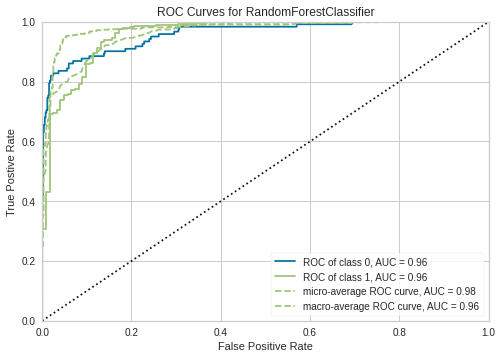

In [26]:
plot_model(dt_tuned, plot = 'auc')

#### Precision-Recall Curve

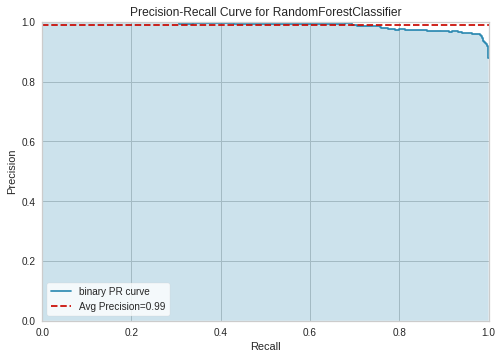

In [27]:
plot_model(dt_tuned, plot = 'pr')

#### Feature Importance Plot

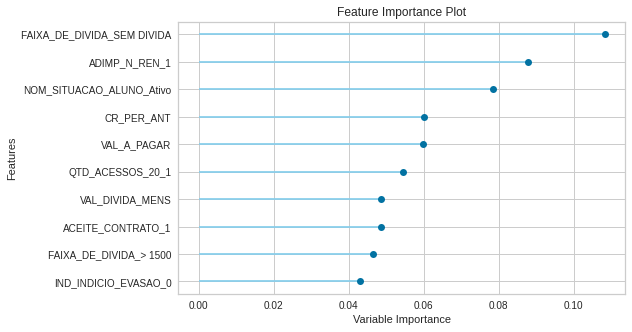

In [28]:
plot_model(dt_tuned, plot='feature')

#### Confusion Matrix

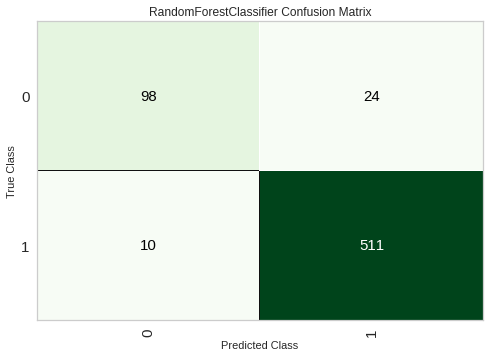

In [29]:
plot_model(dt_tuned, plot = 'confusion_matrix')

#### Error Plot

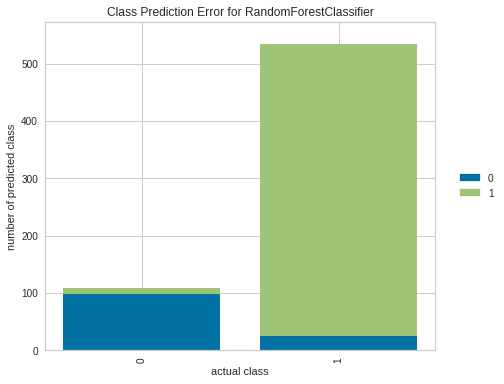

In [30]:
plot_model(dt_tuned, plot = 'error')

#### Learning Curve Plot

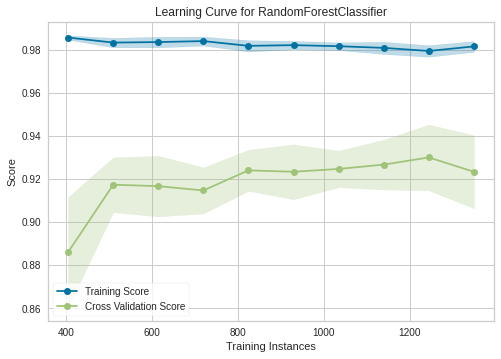

In [34]:
plot_model(dt_tuned, plot = 'learning')

In [31]:
evaluate_model(dt_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…